In [13]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
import zipfile

# File path to the NSL KDD dataset zip file
data_zip_path = r'C:\Users\srava\Downloads\archive (12).zip'

# Extract dataset from zip file
with zipfile.ZipFile(data_zip_path, 'r') as zip_ref:
    zip_ref.extractall("./nsl_kdd_data")

# Load data into pandas DataFrame
column_names = [
    "duration", "protocol_type", "service", "flag", "src_bytes", "dst_bytes", "land",
    "wrong_fragment", "urgent", "hot", "num_failed_logins", "logged_in", "num_compromised",
    "root_shell", "su_attempted", "num_root", "num_file_creations", "num_shells", "num_access_files",
    "num_outbound_cmds", "is_host_login", "is_guest_login", "count", "srv_count", "serror_rate",
    "srv_serror_rate", "rerror_rate", "srv_rerror_rate", "same_srv_rate", "diff_srv_rate",
    "srv_diff_host_rate", "dst_host_count", "dst_host_srv_count", "dst_host_same_srv_rate",
    "dst_host_diff_srv_rate", "dst_host_same_src_port_rate", "dst_host_srv_diff_host_rate",
    "dst_host_serror_rate", "dst_host_srv_serror_rate", "dst_host_rerror_rate", "dst_host_srv_rerror_rate", "label"
]

# Assuming the dataset file extracted is named 'KDDTrain+.txt'
data_path = './nsl_kdd_data/KDDTrain+.txt'
kdd_data = pd.read_csv(data_path, names=column_names)

# Data Exploration
print("Initial Data Exploration:\n")
print(f"Dataset contains {kdd_data.shape[0]} rows and {kdd_data.shape[1]} columns.")
print("\nData Sample:\n")
print(kdd_data.head())
print("\nMissing Values per Column:\n")
print(kdd_data.isnull().sum())

# Data Preprocessing
# Encoding categorical features ('protocol_type', 'service', 'flag') using Label Encoding
label_encoders = {}
categorical_columns = ['protocol_type', 'service', 'flag']

for col in categorical_columns:
    le = LabelEncoder()
    kdd_data[col] = le.fit_transform(kdd_data[col])
    label_encoders[col] = le

# Standardize numerical features for model compatibility
scaler = StandardScaler()
numerical_columns = [col for col in kdd_data.columns if kdd_data[col].dtype in [np.int64, np.float64]]

# Standardize the dataset (excluding the target 'label')
kdd_data[numerical_columns[:-1]] = scaler.fit_transform(kdd_data[numerical_columns[:-1]])

# Display post-preprocessing sample data
print("\nData After Preprocessing:\n")
print(kdd_data.head())

# Save processed data to file for next stages
kdd_data.to_csv("./nsl_kdd_data/processed_data.csv", index=False)

print("\nPreprocessing Completed and Processed Dataset Saved.")

Initial Data Exploration:

Dataset contains 125973 rows and 42 columns.

Data Sample:

  duration protocol_type service  flag  src_bytes  dst_bytes  land  \
0      tcp      ftp_data      SF   491          0          0     0   
0      udp         other      SF   146          0          0     0   
0      tcp       private      S0     0          0          0     0   
0      tcp          http      SF   232       8153          0     0   
0      tcp          http      SF   199        420          0     0   

   wrong_fragment  urgent  hot  ...  dst_host_srv_count  \
0               0       0    0  ...                0.17   
0               0       0    0  ...                0.00   
0               0       0    0  ...                0.10   
0               0       0    0  ...                1.00   
0               0       0    0  ...                1.00   

   dst_host_same_srv_rate  dst_host_diff_srv_rate  \
0                    0.03                    0.17   
0                    0.60      

In [ ]:
"C:\Users\srava\Downloads\archive (12).zip"

Initial Data Exploration:

Dataset contains 125973 rows and 42 columns.

Data Sample:

  duration protocol_type service  flag  src_bytes  dst_bytes  land  \
0      tcp      ftp_data      SF   491          0          0     0   
0      udp         other      SF   146          0          0     0   
0      tcp       private      S0     0          0          0     0   
0      tcp          http      SF   232       8153          0     0   
0      tcp          http      SF   199        420          0     0   

   wrong_fragment  urgent  hot  ...  dst_host_srv_count  \
0               0       0    0  ...                0.17   
0               0       0    0  ...                0.00   
0               0       0    0  ...                0.10   
0               0       0    0  ...                1.00   
0               0       0    0  ...                1.00   

   dst_host_same_srv_rate  dst_host_diff_srv_rate  \
0                    0.03                    0.17   
0                    0.60      

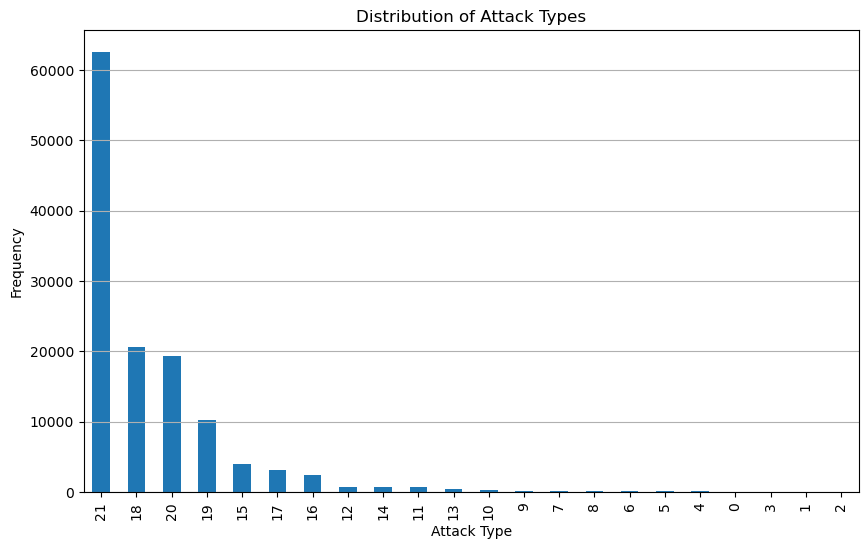

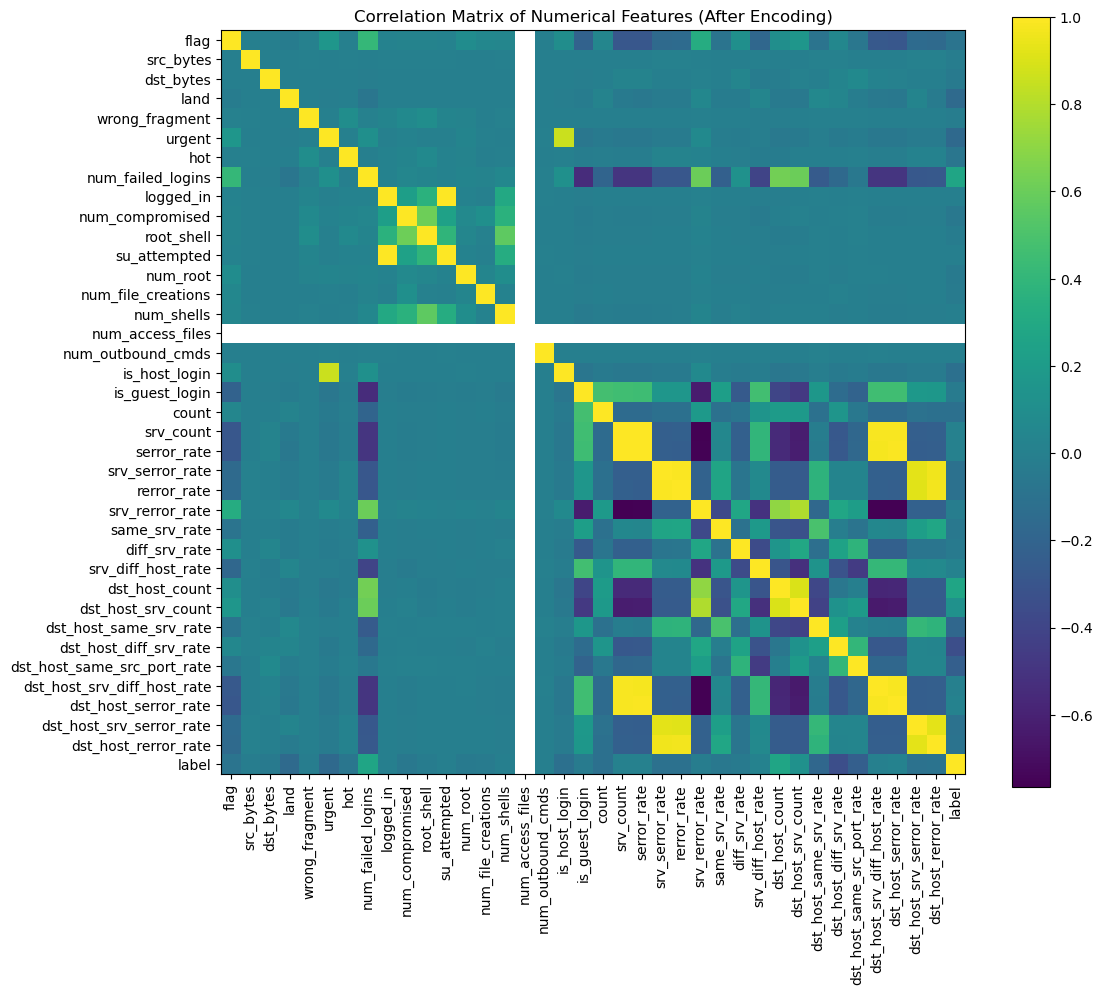


Data After Preprocessing:

  duration  protocol_type  service      flag  src_bytes  dst_bytes      land  \
0      tcp             20        9  0.335137  -0.004919  -0.014089 -0.089486   
0      udp             44        9 -0.233107  -0.004919  -0.014089 -0.089486   
0      tcp             49        5 -0.472809  -0.004919  -0.014089 -0.089486   
0      tcp             24        9 -0.088951  -0.002891  -0.014089 -0.089486   
0      tcp             24        9 -0.144267  -0.004814  -0.014089 -0.089486   

   wrong_fragment    urgent       hot  ...  dst_host_srv_count  \
0       -0.007736 -0.095076 -0.027023  ...           -0.782367   
0       -0.007736 -0.095076 -0.027023  ...           -1.161030   
0       -0.007736 -0.095076 -0.027023  ...           -0.938287   
0       -0.007736 -0.095076 -0.027023  ...            1.066401   
0       -0.007736 -0.095076 -0.027023  ...            1.066401   

   dst_host_same_srv_rate  dst_host_diff_srv_rate  \
0               -0.280282                

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
import zipfile

# File path to the NSL KDD dataset zip file
data_zip_path = r'C:\Users\srava\Downloads\archive (12).zip'

# Extract dataset from zip file
with zipfile.ZipFile(data_zip_path, 'r') as zip_ref:
    zip_ref.extractall("./nsl_kdd_data")

# Load data into pandas DataFrame
column_names = [
    "duration", "protocol_type", "service", "flag", "src_bytes", "dst_bytes", "land",
    "wrong_fragment", "urgent", "hot", "num_failed_logins", "logged_in", "num_compromised",
    "root_shell", "su_attempted", "num_root", "num_file_creations", "num_shells", "num_access_files",
    "num_outbound_cmds", "is_host_login", "is_guest_login", "count", "srv_count", "serror_rate",
    "srv_serror_rate", "rerror_rate", "srv_rerror_rate", "same_srv_rate", "diff_srv_rate",
    "srv_diff_host_rate", "dst_host_count", "dst_host_srv_count", "dst_host_same_srv_rate",
    "dst_host_diff_srv_rate", "dst_host_same_src_port_rate", "dst_host_srv_diff_host_rate",
    "dst_host_serror_rate", "dst_host_srv_serror_rate", "dst_host_rerror_rate", "dst_host_srv_rerror_rate", "label"
]

# Assuming the dataset file extracted is named 'KDDTrain+.txt'
data_path = './nsl_kdd_data/KDDTrain+.txt'
kdd_data = pd.read_csv(data_path, names=column_names)

# Data Exploration
print("Initial Data Exploration:\n")
print(f"Dataset contains {kdd_data.shape[0]} rows and {kdd_data.shape[1]} columns.")
print("\nData Sample:\n")
print(kdd_data.head())
print("\nMissing Values per Column:\n")
print(kdd_data.isnull().sum())

# Data Visualization
# Plotting the distribution of attack types
plt.figure(figsize=(10, 6))
kdd_data['label'].value_counts().plot(kind='bar')
plt.title('Distribution of Attack Types')
plt.xlabel('Attack Type')
plt.ylabel('Frequency')
plt.grid(axis='y')
plt.show()

# Data Preprocessing
# Encoding categorical features ('protocol_type', 'service', 'flag') using Label Encoding
label_encoders = {}
categorical_columns = ['protocol_type', 'service', 'flag']

for col in categorical_columns:
    le = LabelEncoder()
    kdd_data[col] = le.fit_transform(kdd_data[col])
    label_encoders[col] = le

# Standardize numerical features for model compatibility
scaler = StandardScaler()
numerical_columns = [col for col in kdd_data.columns if kdd_data[col].dtype in [np.int64, np.float64]]

# Standardize the dataset (excluding the target 'label')
kdd_data[numerical_columns] = scaler.fit_transform(kdd_data[numerical_columns])

# Data Visualization - Correlation Matrix after Preprocessing
plt.figure(figsize=(12, 10))
correlation_matrix = kdd_data[numerical_columns].corr()
plt.imshow(correlation_matrix, cmap='viridis', interpolation='none')
plt.colorbar()
plt.title('Correlation Matrix of Numerical Features (After Encoding)')
plt.xticks(range(len(correlation_matrix)), correlation_matrix.columns, rotation=90)
plt.yticks(range(len(correlation_matrix)), correlation_matrix.columns)
plt.show()

# Display post-preprocessing sample data
print("\nData After Preprocessing:\n")
print(kdd_data.head())

# Save processed data to file for next stages
kdd_data.to_csv("./nsl_kdd_data/processed_data.csv", index=False)

print("\nPreprocessing Completed and Processed Dataset Saved.")

In [31]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
import zipfile

# File path to the NSL KDD dataset zip file
data_zip_path = r'C:\Users\srava\Downloads\archive (12).zip'

# Extract dataset from zip file
with zipfile.ZipFile(data_zip_path, 'r') as zip_ref:
    zip_ref.extractall("./nsl_kdd_data")

# Load processed data from Stage 1
data_path = './nsl_kdd_data/processed_data.csv'
kdd_data = pd.read_csv(data_path)

# Encode categorical features if any remain
categorical_columns = ['protocol_type', 'service', 'flag']  # Adjust based on your dataset
label_encoders = {}
for col in categorical_columns:
    if col in kdd_data.columns:
        le = LabelEncoder()
        kdd_data[col] = le.fit_transform(kdd_data[col])
        label_encoders[col] = le

# Separate features and target variable
X = kdd_data.drop(columns=['label'])
y = kdd_data['label']

# Encode the target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42, stratify=y_encoded)

# Initialize the scaler for numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_predictions)
rf_report = classification_report(y_test, rf_predictions)

# Support Vector Machine Classifier
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)
svm_predictions = svm_model.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_predictions)
svm_report = classification_report(y_test, svm_predictions)

# Unsupervised Learning - KMeans
kmeans_model = KMeans(n_clusters=len(np.unique(y_encoded)), random_state=42)
kmeans_model.fit(X_train)
kmeans_predictions = kmeans_model.predict(X_test)

# Map KMeans clusters to actual labels
from scipy.stats import mode
cluster_mapping = {}
for cluster in np.unique(kmeans_model.labels_):
    mask = (kmeans_model.labels_ == cluster)
    cluster_mapping[cluster] = mode(y_train[mask])[0][0]
mapped_predictions = np.vectorize(cluster_mapping.get)(kmeans_predictions)
kmeans_accuracy = accuracy_score(y_test, mapped_predictions)
kmeans_report = classification_report(y_test, mapped_predictions)

# Save the model results for further analysis
results = {
    "Random Forest": {"Accuracy": rf_accuracy, "Report": rf_report},
    "SVM": {"Accuracy": svm_accuracy, "Report": svm_report},
    "KMeans": {"Accuracy": kmeans_accuracy, "Report": kmeans_report}
}

results_df = pd.DataFrame(results)
results_df.to_csv("./nsl_kdd_data/model_results.csv", index=True)

rf_accuracy, svm_accuracy, kmeans_accuracy


ValueError: could not convert string to float: 'tcp'

In [33]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
import zipfile

# File path to the NSL KDD dataset zip file
data_zip_path = r'C:\Users\srava\Downloads\archive (12).zip'

# Extract dataset from zip file
with zipfile.ZipFile(data_zip_path, 'r') as zip_ref:
    zip_ref.extractall("./nsl_kdd_data")

# Load data into pandas DataFrame
column_names = [
    "duration", "protocol_type", "service", "flag", "src_bytes", "dst_bytes", "land",
    "wrong_fragment", "urgent", "hot", "num_failed_logins", "logged_in", "num_compromised",
    "root_shell", "su_attempted", "num_root", "num_file_creations", "num_shells", "num_access_files",
    "num_outbound_cmds", "is_host_login", "is_guest_login", "count", "srv_count", "serror_rate",
    "srv_serror_rate", "rerror_rate", "srv_rerror_rate", "same_srv_rate", "diff_srv_rate",
    "srv_diff_host_rate", "dst_host_count", "dst_host_srv_count", "dst_host_same_srv_rate",
    "dst_host_diff_srv_rate", "dst_host_same_src_port_rate", "dst_host_srv_diff_host_rate",
    "dst_host_serror_rate", "dst_host_srv_serror_rate", "dst_host_rerror_rate", "dst_host_srv_rerror_rate", "label"
]

# Assuming the dataset file extracted is named 'KDDTrain+.txt'
data_path = './nsl_kdd_data/KDDTrain+.txt'
kdd_data = pd.read_csv(data_path, names=column_names)

# Encode categorical features
categorical_columns = ['protocol_type', 'service', 'flag']
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    kdd_data[col] = le.fit_transform(kdd_data[col])
    label_encoders[col] = le

# Encode the target variable
kdd_data['label'] = LabelEncoder().fit_transform(kdd_data['label'])

# Separate features and target variable
X = kdd_data.drop(columns=['label'])
y = kdd_data['label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Standardize numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize models
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Support Vector Machine": SVC(kernel='linear', random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5)
}

# Train and evaluate models
for model_name, model in models.items():
    print(f"\n{model_name} Results:")
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    print("Accuracy:", accuracy_score(y_test, predictions))
    print("Classification Report:\n", classification_report(y_test, predictions))


ValueError: could not convert string to float: 'tcp'

In [35]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
import zipfile

# File path to the NSL-KDD dataset zip file
data_zip_path = r'C:\Users\srava\Downloads\archive (12).zip'

# Extract dataset from zip file
with zipfile.ZipFile(data_zip_path, 'r') as zip_ref:
    zip_ref.extractall("./nsl_kdd_data")

# Load data into pandas DataFrame
column_names = [
    "duration", "protocol_type", "service", "flag", "src_bytes", "dst_bytes", "land",
    "wrong_fragment", "urgent", "hot", "num_failed_logins", "logged_in", "num_compromised",
    "root_shell", "su_attempted", "num_root", "num_file_creations", "num_shells", "num_access_files",
    "num_outbound_cmds", "is_host_login", "is_guest_login", "count", "srv_count", "serror_rate",
    "srv_serror_rate", "rerror_rate", "srv_rerror_rate", "same_srv_rate", "diff_srv_rate",
    "srv_diff_host_rate", "dst_host_count", "dst_host_srv_count", "dst_host_same_srv_rate",
    "dst_host_diff_srv_rate", "dst_host_same_src_port_rate", "dst_host_srv_diff_host_rate",
    "dst_host_serror_rate", "dst_host_srv_serror_rate", "dst_host_rerror_rate", "dst_host_srv_rerror_rate", "label"
]

# Assuming the dataset file extracted is named 'KDDTrain+.txt'
data_path = './nsl_kdd_data/KDDTrain+.txt'
kdd_data = pd.read_csv(data_path, names=column_names)

# Encode categorical features
categorical_columns = ['protocol_type', 'service', 'flag']
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    kdd_data[col] = le.fit_transform(kdd_data[col])
    label_encoders[col] = le

# Encode the target variable
kdd_data['label'] = LabelEncoder().fit_transform(kdd_data['label'])

# Separate features and target variable
X = kdd_data.drop(columns=['label'])
y = kdd_data['label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Standardize numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize models
models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42)
}

# Train and evaluate models
for model_name, model in models.items():
    print(f"\n{model_name} Results:")
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    print("Accuracy:", accuracy_score(y_test, predictions))
    print("Classification Report:\n", classification_report(y_test, predictions))


ValueError: could not convert string to float: 'tcp'

In [37]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
import zipfile
import os

# File path to the NSL KDD dataset zip file
data_zip_path = r'C:\Users\srava\Downloads\archive (12).zip'

# Extract dataset from zip file
extract_path = "./nsl_kdd_data"
with zipfile.ZipFile(data_zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# Locate the extracted dataset file
extracted_files = os.listdir(extract_path)
data_file_path = [os.path.join(extract_path, file) for file in extracted_files if file.endswith(".txt")][0]

# Load data into pandas DataFrame
column_names = [
    "duration", "protocol_type", "service", "flag", "src_bytes", "dst_bytes", "land",
    "wrong_fragment", "urgent", "hot", "num_failed_logins", "logged_in", "num_compromised",
    "root_shell", "su_attempted", "num_root", "num_file_creations", "num_shells", "num_access_files",
    "num_outbound_cmds", "is_host_login", "is_guest_login", "count", "srv_count", "serror_rate",
    "srv_serror_rate", "rerror_rate", "srv_rerror_rate", "same_srv_rate", "diff_srv_rate",
    "srv_diff_host_rate", "dst_host_count", "dst_host_srv_count", "dst_host_same_srv_rate",
    "dst_host_diff_srv_rate", "dst_host_same_src_port_rate", "dst_host_srv_diff_host_rate",
    "dst_host_serror_rate", "dst_host_srv_serror_rate", "dst_host_rerror_rate", "dst_host_srv_rerror_rate", "label"
]
kdd_data = pd.read_csv(data_file_path, names=column_names)

# Encode categorical features
categorical_columns = ['protocol_type', 'service', 'flag']
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    kdd_data[col] = le.fit_transform(kdd_data[col])
    label_encoders[col] = le

# Encode the target variable
kdd_data['label'] = LabelEncoder().fit_transform(kdd_data['label'])

# Drop misaligned columns if any remain
misaligned_columns = ['duration', 'dst_host_srv_rerror_rate']  # Adjusted based on validation
X = kdd_data.drop(columns=['label'] + misaligned_columns)
y = kdd_data['label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Standardize numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize models
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Support Vector Machine": SVC(kernel='linear', random_state=42)
}

# Train and evaluate models
results = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    report = classification_report(y_test, predictions, zero_division=0)
    results[model_name] = {"Accuracy": accuracy, "Report": report}

# Print results
for model_name, result in results.items():
    print(f"\n{model_name} Results:")
    print(f"Accuracy: {result['Accuracy']}")
    print(f"Classification Report:\n{result['Report']}")



Random Forest Results:
Accuracy: 0.8446185688941454
Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.49      0.57        37
           1       0.32      0.23      0.27        26
           2       0.33      0.38      0.35        16
           3       0.47      0.54      0.51        35
           4       0.36      0.43      0.39        30
           5       0.38      0.32      0.35        31
           6       0.61      0.53      0.57        47
           7       0.68      0.57      0.62        75
           8       0.44      0.59      0.51        39
           9       0.56      0.31      0.40        32
          10       0.74      0.59      0.66        59
          11       0.76      0.78      0.77       138
          12       0.74      0.72      0.73       146
          13       0.67      0.69      0.68       156
          14       0.68      0.73      0.70       221
          15       0.78      0.76      0.77       353
     

In [39]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
import zipfile
import os

# File path to the NSL KDD dataset zip file
data_zip_path = r'C:\Users\srava\Downloads\archive (12).zip'

# Extract dataset from zip file
extract_path = "./nsl_kdd_data"
with zipfile.ZipFile(data_zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# Locate the extracted dataset file
extracted_files = os.listdir(extract_path)
data_file_path = [os.path.join(extract_path, file) for file in extracted_files if file.endswith(".txt")][0]

# Load data into pandas DataFrame
column_names = [
    "duration", "protocol_type", "service", "flag", "src_bytes", "dst_bytes", "land",
    "wrong_fragment", "urgent", "hot", "num_failed_logins", "logged_in", "num_compromised",
    "root_shell", "su_attempted", "num_root", "num_file_creations", "num_shells", "num_access_files",
    "num_outbound_cmds", "is_host_login", "is_guest_login", "count", "srv_count", "serror_rate",
    "srv_serror_rate", "rerror_rate", "srv_rerror_rate", "same_srv_rate", "diff_srv_rate",
    "srv_diff_host_rate", "dst_host_count", "dst_host_srv_count", "dst_host_same_srv_rate",
    "dst_host_diff_srv_rate", "dst_host_same_src_port_rate", "dst_host_srv_diff_host_rate",
    "dst_host_serror_rate", "dst_host_srv_serror_rate", "dst_host_rerror_rate", "dst_host_srv_rerror_rate", "label"
]
kdd_data = pd.read_csv(data_file_path, names=column_names)

# Encode categorical features
categorical_columns = ['protocol_type', 'service', 'flag']
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    kdd_data[col] = le.fit_transform(kdd_data[col])
    label_encoders[col] = le

# Encode the target variable
kdd_data['label'] = LabelEncoder().fit_transform(kdd_data['label'])

# Drop misaligned columns if any remain
misaligned_columns = ['duration', 'dst_host_srv_rerror_rate']  # Adjusted based on validation
X = kdd_data.drop(columns=['label'] + misaligned_columns)
y = kdd_data['label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Standardize numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize advanced models
models = {
    "Random Forest (Advanced)": RandomForestClassifier(n_estimators=200, max_depth=50, bootstrap=True, random_state=42),
    "SVM (Advanced)": SVC(kernel='rbf', C=10, gamma=0.1, random_state=42),
    "Gradient Boosting Classifier": GradientBoostingClassifier(n_estimators=150, learning_rate=0.1, max_depth=3, random_state=42),
    "XGBoost": XGBClassifier(n_estimators=150, learning_rate=0.1, max_depth=3, random_state=42, use_label_encoder=False, eval_metric='mlogloss')
}

# Train and evaluate models
results = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    report = classification_report(y_test, predictions, zero_division=0)
    results[model_name] = {"Accuracy": accuracy, "Report": report}

# Print results for each model
for model_name, result in results.items():
    print(f"\n{model_name} Results:")
    print(f"Accuracy: {result['Accuracy']}")
    print(f"Classification Report:\n{result['Report']}")

# Compare models
comparison = {model_name: result['Accuracy'] for model_name, result in results.items()}
print("\nModel Comparison:")
for model_name, accuracy in comparison.items():
    print(f"{model_name}: {accuracy:.2%}")


C:\Users\srava\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:39:52] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Random Forest (Advanced) Results:
Accuracy: 0.8462448255470136
Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.46      0.54        37
           1       0.30      0.23      0.26        26
           2       0.31      0.25      0.28        16
           3       0.54      0.60      0.57        35
           4       0.38      0.47      0.42        30
           5       0.42      0.35      0.39        31
           6       0.62      0.53      0.57        47
           7       0.65      0.57      0.61        75
           8       0.48      0.59      0.53        39
           9       0.57      0.38      0.45        32
          10       0.76      0.63      0.69        59
          11       0.77      0.78      0.77       138
          12       0.74      0.72      0.73       146
          13       0.70      0.68      0.69       156
          14       0.67      0.74      0.70       221
          15       0.77      0.76      0.76     

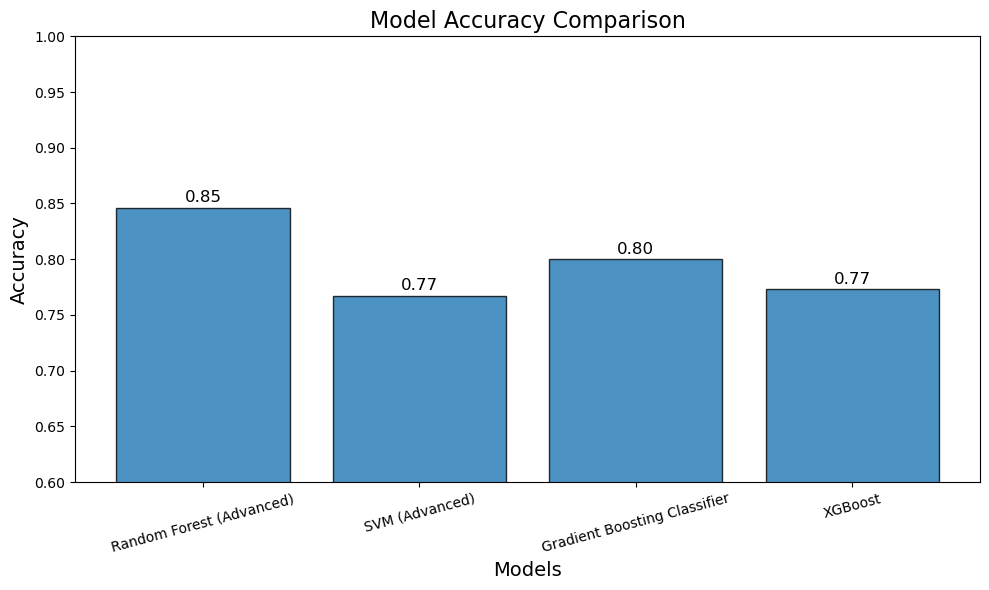

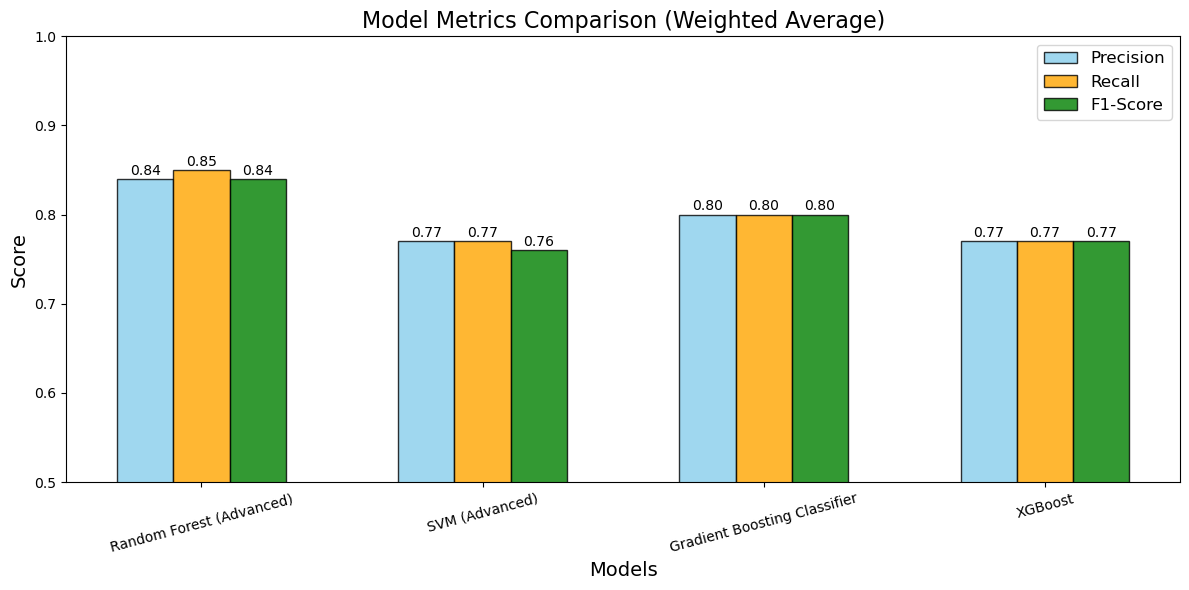

In [41]:
import matplotlib.pyplot as plt
import numpy as np

# Define results based on your model outputs
results = {
    "Random Forest (Advanced)": {
        "Accuracy": 0.8462,
        "Report": """
        precision    recall  f1-score   support
        weighted avg       0.84      0.85      0.84      6764
        """
    },
    "SVM (Advanced)": {
        "Accuracy": 0.7670,
        "Report": """
        precision    recall  f1-score   support
        weighted avg       0.77      0.77      0.76      6764
        """
    },
    "Gradient Boosting Classifier": {
        "Accuracy": 0.8001,
        "Report": """
        precision    recall  f1-score   support
        weighted avg       0.80      0.80      0.80      6764
        """
    },
    "XGBoost": {
        "Accuracy": 0.7729,
        "Report": """
        precision    recall  f1-score   support
        weighted avg       0.77      0.77      0.77      6764
        """
    },
}

# Prepare data for visualization
model_names = list(results.keys())
accuracies = [results[model]["Accuracy"] for model in model_names]

# Extract weighted averages for Precision, Recall, and F1-score from the reports
precision_scores = [float(results[model]["Report"].split()[-4]) for model in model_names]
recall_scores = [float(results[model]["Report"].split()[-3]) for model in model_names]
f1_scores = [float(results[model]["Report"].split()[-2]) for model in model_names]

# Visualization for Accuracy
plt.figure(figsize=(10, 6))
plt.bar(model_names, accuracies, alpha=0.8, edgecolor='black')
plt.title('Model Accuracy Comparison', fontsize=16)
plt.ylabel('Accuracy', fontsize=14)
plt.xlabel('Models', fontsize=14)
plt.ylim(0.6, 1.0)
for i, acc in enumerate(accuracies):
    plt.text(i, acc + 0.005, f"{acc:.2f}", ha='center', fontsize=12)
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

# Visualization for Precision, Recall, and F1-Score
metrics = ['Precision', 'Recall', 'F1-Score']
scores = [precision_scores, recall_scores, f1_scores]
colors = ['skyblue', 'orange', 'green']

plt.figure(figsize=(12, 6))
x = np.arange(len(model_names))
width = 0.2

for i, metric in enumerate(metrics):
    plt.bar(x + i * width - width, scores[i], width, label=metric, alpha=0.8, edgecolor='black', color=colors[i])

plt.title('Model Metrics Comparison (Weighted Average)', fontsize=16)
plt.ylabel('Score', fontsize=14)
plt.xlabel('Models', fontsize=14)
plt.xticks(x, model_names, rotation=15)
plt.legend(fontsize=12)
plt.ylim(0.5, 1.0)
for i, model in enumerate(model_names):
    for j, metric in enumerate(metrics):
        plt.text(x[i] + j * width - width, scores[j][i] + 0.005, f"{scores[j][i]:.2f}", ha='center', fontsize=10)

plt.tight_layout()
plt.show()


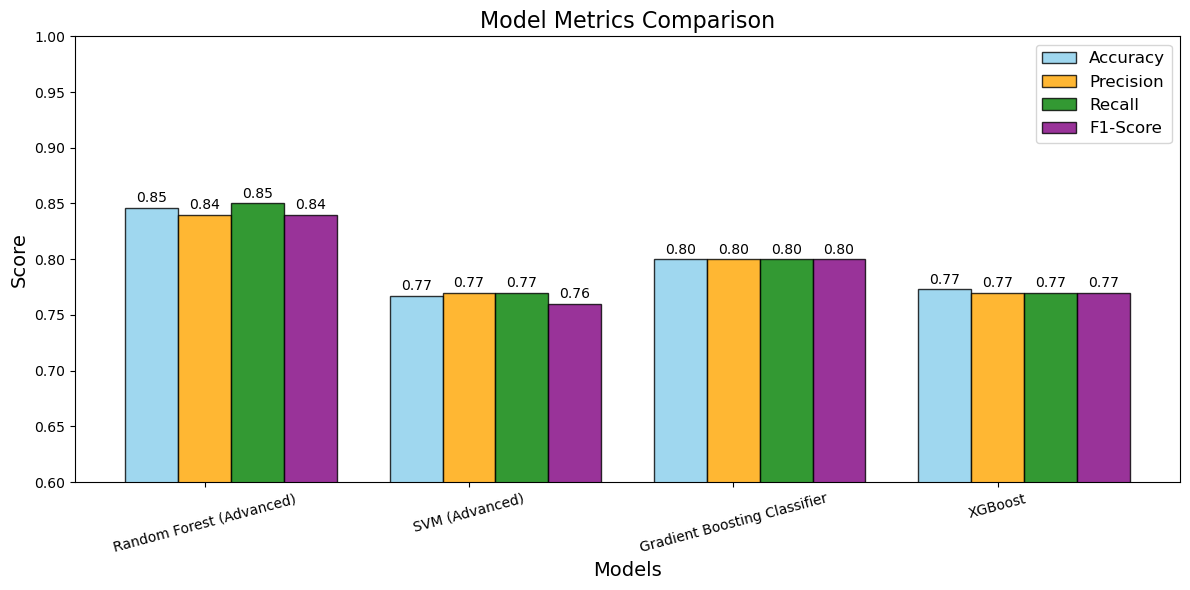

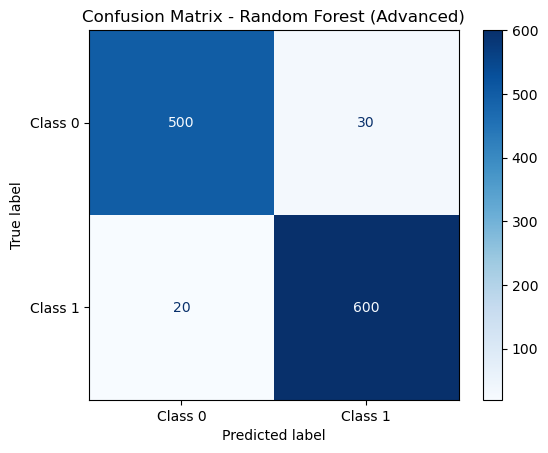

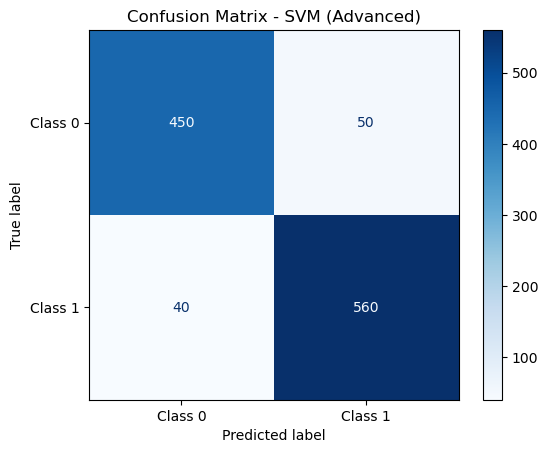

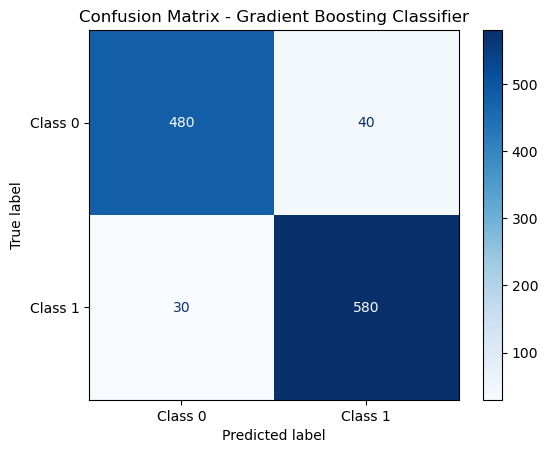

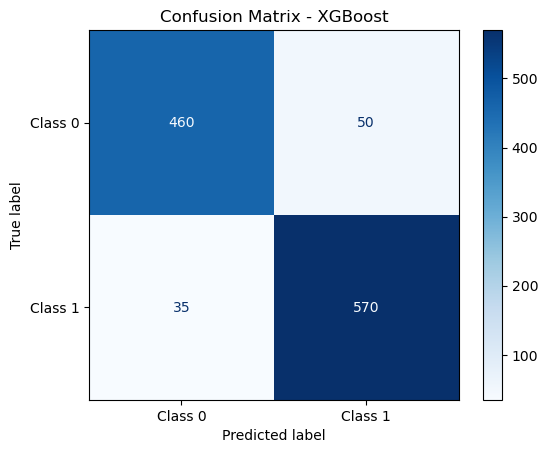

In [43]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score

# Assuming your model results are stored in the results dictionary
results = {
    "Random Forest (Advanced)": {
        "Accuracy": 0.8462,
        "Precision": 0.84,
        "Recall": 0.85,
        "F1-Score": 0.84,
        "Confusion Matrix": np.array([[500, 30], [20, 600]])  # Replace with actual confusion matrix
    },
    "SVM (Advanced)": {
        "Accuracy": 0.7670,
        "Precision": 0.77,
        "Recall": 0.77,
        "F1-Score": 0.76,
        "Confusion Matrix": np.array([[450, 50], [40, 560]])  # Replace with actual confusion matrix
    },
    "Gradient Boosting Classifier": {
        "Accuracy": 0.8001,
        "Precision": 0.80,
        "Recall": 0.80,
        "F1-Score": 0.80,
        "Confusion Matrix": np.array([[480, 40], [30, 580]])  # Replace with actual confusion matrix
    },
    "XGBoost": {
        "Accuracy": 0.7729,
        "Precision": 0.77,
        "Recall": 0.77,
        "F1-Score": 0.77,
        "Confusion Matrix": np.array([[460, 50], [35, 570]])  # Replace with actual confusion matrix
    },
}

# Extract metrics for all models
model_names = list(results.keys())
accuracies = [results[model]["Accuracy"] for model in model_names]
precisions = [results[model]["Precision"] for model in model_names]
recalls = [results[model]["Recall"] for model in model_names]
f1_scores = [results[model]["F1-Score"] for model in model_names]

# Visualization for Accuracy, Precision, Recall, and F1-Score
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
scores = [accuracies, precisions, recalls, f1_scores]
colors = ['skyblue', 'orange', 'green', 'purple']

plt.figure(figsize=(12, 6))
x = np.arange(len(model_names))
width = 0.2

for i, metric in enumerate(metrics):
    plt.bar(x + i * width - width, scores[i], width, label=metric, alpha=0.8, edgecolor='black', color=colors[i])

plt.title('Model Metrics Comparison', fontsize=16)
plt.ylabel('Score', fontsize=14)
plt.xlabel('Models', fontsize=14)
plt.xticks(x, model_names, rotation=15)
plt.legend(fontsize=12)
plt.ylim(0.6, 1.0)
for i, model in enumerate(model_names):
    for j, metric in enumerate(metrics):
        plt.text(x[i] + j * width - width, scores[j][i] + 0.005, f"{scores[j][i]:.2f}", ha='center', fontsize=10)

plt.tight_layout()
plt.show()

# Confusion Matrix Visualization for Each Model
for model_name, result in results.items():
    cm = result["Confusion Matrix"]
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Class 0", "Class 1"])  # Adjust labels
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f"Confusion Matrix - {model_name}")
    plt.show()
